In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


지하철 시간대별 이용 현황 데이터 시각화하기

In [ ]:
import csv
f = open('subwaytime.csv') # 인코딩 utf-8 생략 가능
data = csv.reader(f)

for row in data:
  print(row)

헤더 제외하고 map 함수를 활용한 데이터 타입 바꾸기 (문자열 -> 정수)

In [ ]:
import csv
f = open('subwaytime.csv') # 인코딩 utf-8 생략 가능
data = csv.reader(f)
next(data)
next(data)

for row in data:
  row[4:] = map(int,row[4:])
  print(row)

출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까? <br>
아침 7시 승차 데이터 추출 -> 10번 인덱스 데이터 값 추출

In [ ]:
import csv
f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
  row[4:] = map(int,row[4:])
  result.append(row[10])

print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

아침 7시 승차 데이터 막대 그래프로 표현하기

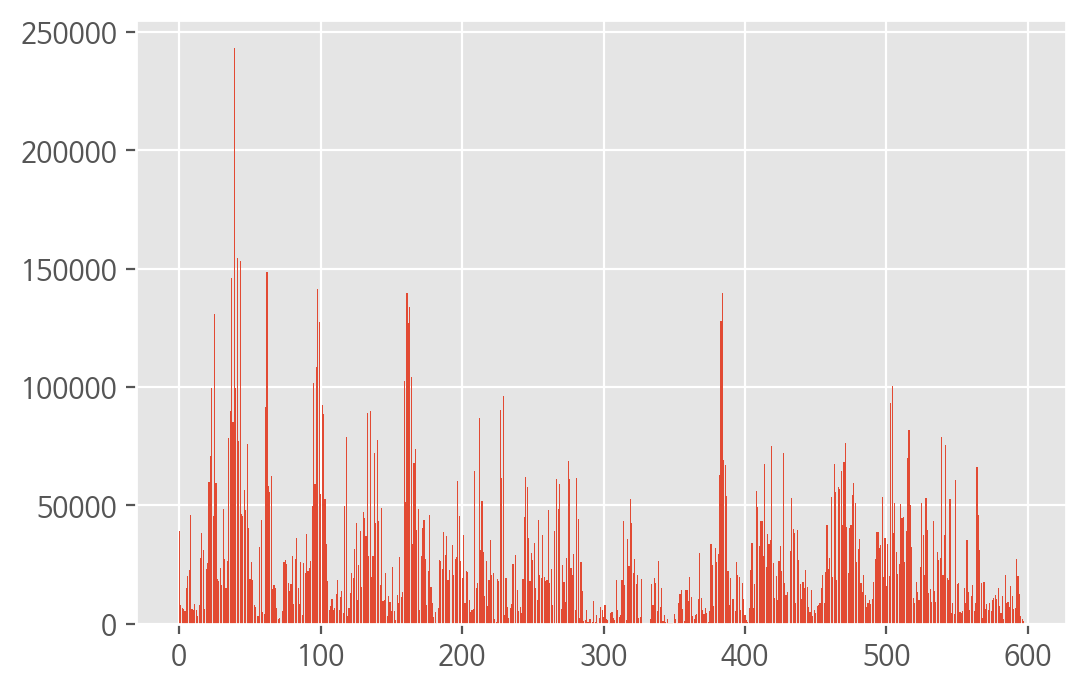

In [ ]:
import csv
f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
  row[4:] = map(int,row[4:])
  result.append(row[10])

# 데이터 시각화
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()


오름차순 정렬

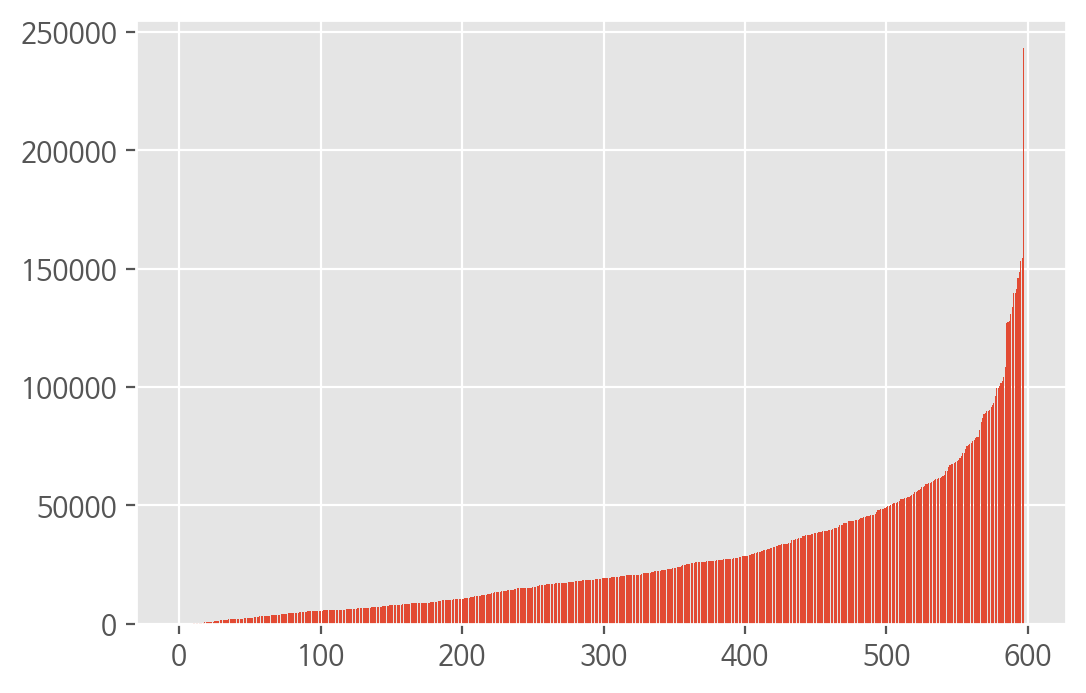

In [ ]:
import csv
f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
  row[4:] = map(int,row[4:])
  result.append(row[10])

result.sort()

# 데이터 시각화
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()


출근 시간 (7-9시) 막대 그래프 그리기

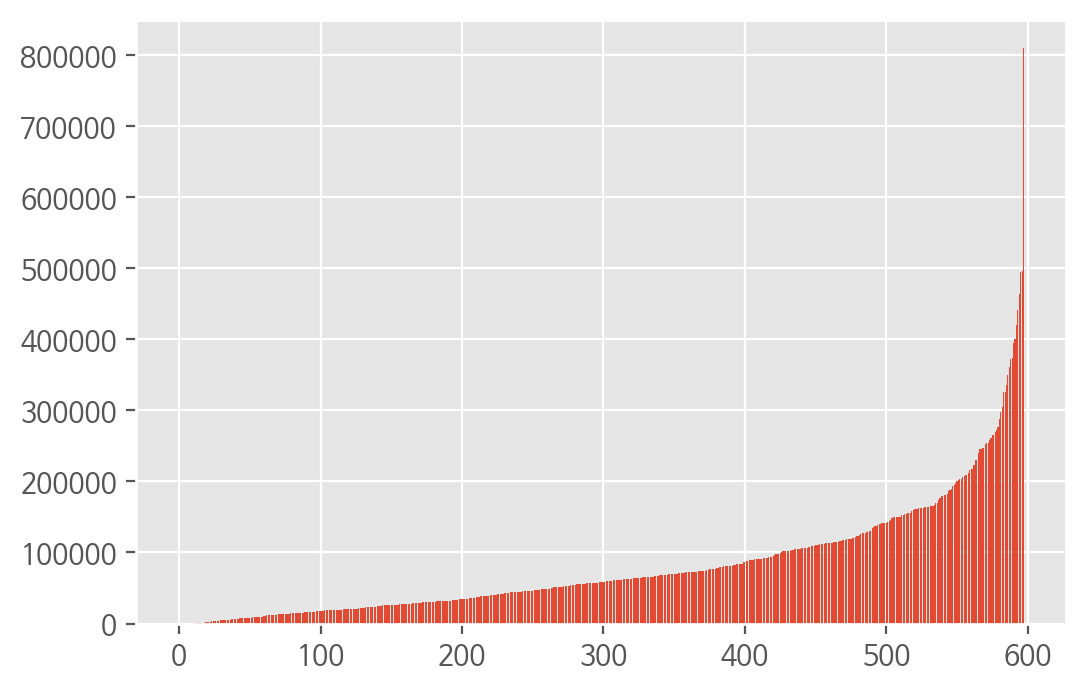

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

result = [] # 출근시간 (7시-9시) 승차 데이터 추출 -> 10,12,14 인덱스에 존재

for row in data:
  row[4:] = map(int,row[4:])
  result.append(sum(row[10:15:2])) # 10 12 14 추출

result.sort()
# 데이터 시각화
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()


출근 시간 최대 방문객 역 찾아보기

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data:
  row[4:] = map(int,row[4:])
  if sum(row[10:15:2]) > mx:
    mx = sum(row[10:15:2])
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

신림(2호선) 809541


출근 시간대에 사람들이 가장 많이 하차하는 역 찾기

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data:
  row[4:] = map(int,row[4:])
  if sum(row[11:16:2]) > mx:
    mx = sum(row[11:16:2])
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

강남(2호선) 984427


퇴근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?

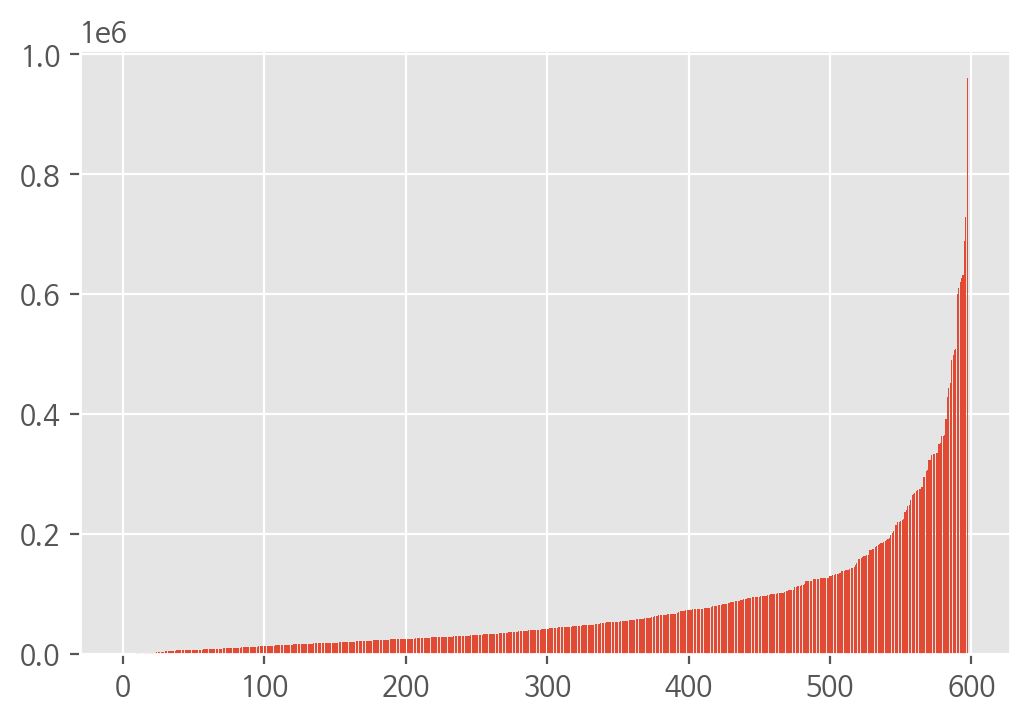

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

result = [] # 출근시간 (7시-9시) 승차 데이터 추출 -> 10,12,14 인덱스에 존재

for row in data:
  row[4:] = map(int,row[4:])
  result.append(sum(row[32:37:2])) 

result.sort()
# 데이터 시각화
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.bar(range(len(result)),result)
plt.show()


In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data:
  row[4:] = map(int,row[4:])
  if sum(row[32:37:2]) > mx:
    mx = sum(row[32:37:2])
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

강남(2호선) 959125


In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data:
  row[4:] = map(int,row[4:])
  if sum(row[33:38:2]) > mx:
    mx = sum(row[33:38:2])
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

신림(2호선) 733480
